# Изменение типов данных

Данные бывают разных типов, не всегда подходящих для анализа. В этой теме вы узнаете, как изменять типы данных для удобства расчётов. 

Задачи сегодняшнего занятия:

•	Переводить строку в форматы даты и времени;

•	Превращать строковые значения в числовые методами **to_numeric()** и **astype()**;

•	Соединять таблицы методом **merge()**;

•	Создавать сводные таблицы методом **pivot_table()**.


Задача: SEO-оптимизаторы поставили задачу "Определить, какие товарные категории и подкатегории на сайте представлены в поисковиках хуже всего". В ответ на просьбу направить таблицы с источниками трафика, товарными категориями и подкатегориями, разработчики прислали экселевский файл.

Ранее мы встречались только с форматом **.csv** и методом **read_csv()**. Для прочтения файлов **Excel** есть особый метод **read_excel()**. Он похож на **read_csv()**, но в отличие от него, **read_excel()** нужно два аргумента: строка с именем самого файла или пути к нему, и имя листа **sheet_name**.

**import pandas as pd**

**df = pd.read_excel('/datasets/Экселевский файл.xlsx', sheet_name='Самый первый лист')** 

Можно вызвать **read_excel()** и без второго аргумента. Тогда будет взят первый по счёту лист.
Вооружившись методом **read_excel()**, прочитаем файл с таблицами от разработчиков.


## Задача 

1. Методом **read_excel()** прочтите первый лист **'traffic_data'**, сохраните его в переменной **data**. Выведите на экран первые 5 строк листа методом **head()**. Прочитайте названия столбцов:

•	**subcategory_id** — идентификатор товарной подкатегории, или её зашифрованное название;

•	**source** — источник трафика. В нашем случае источников два: прямой заход на сайт в таблице обозначен как direct, переход из поисковых систем — **organic**;

•	**visits** — количество визитов на страницу подкатегории за отчётный период.



In [21]:
import pandas as pd
data = pd.read_excel('seo_data.xlsx', sheet_name = 'traffic_data')
data.head(5)

,subcategory_id,source,visits
0,cf2e61c7af,direct,501165.668858
1,0cd903d1cc,direct,126342.359505
2,ef35bc88a7,direct,95626.321402
3,6ff9f4014c,direct,75680.653002
4,72bc238e4d,direct,64435.934651


Пока в первых 5 строчках таблицы виден только один источник трафика direct. Проверьте, какие источники есть в столбце source. Выведите на экран список уникальных значений этого столбца.


In [22]:
data['source'].unique()

array(['direct', 'organic'], dtype=object)

Методом **read_excel()** прочтите второй лист **'subcategory_ids'** и сохраните его в переменной **subcategory_dict**. Выведите на экран его первые 5 строк методом **head()**.
Обратите внимание на названия столбцов: к знакомым нам идентификаторам подкатегорий **(subcategory_id)** добавились идентификаторы категорий **(category_id)** и названия подкатегорий **(subcategory_name)**.
Всё это похоже на словарь, где идентификаторам подкатегорий из цифр и латинских букв соответствуют понятные нам названия. Поэтому датафрейм называется **subcategory_dict**.


In [23]:
subcategory_dict = pd.read_excel('seo_data.xlsx', sheet_name = 'subcategory_ids')
subcategory_dict.head(5)

,subcategory_id,subcategory_name,category_id
0,cf2e61c7af,Мобильные телефоны,09f279a643
1,0cd903d1cc,Ноутбуки,3509869a61
2,ef35bc88a7,Телевизоры,09f279a643
3,6ff9f4014c,Планшеты,3509869a61
4,72bc238e4d,Наушники и Bluetooth-гарнитуры,09f279a643


Наконец, методом **read_excel()** прочтём третий лист **category_ids** и сохраним его в переменной **category_dict**. Выведите на экран первые 5 строк листа методом **head()**.

In [24]:
category_dict = pd.read_excel('seo_data.xlsx', sheet_name = 'category_ids')
category_dict.head(5)


,category_id,category_name
0,09f279a643,Электроника
1,3509869a61,Компьютерная техника
2,65922fa39c,Авто
3,6074ad29ac,"Одежда, обувь и аксессуары"
4,10a493e03b,Товары для здоровья


# Перевод строковых значений в числа

Читая данные, Pandas автоматически переводит их в подходящий формат. У него порой не получается, тогда приходится измениять тип данных вручную.

Рассмотрим файл со списком транзакций (платежей за одну покупку). Для каждой категории (буква в столбце **'category'**) посчитаем сумму продаж (значения в столбце **'amount'**).

In [25]:
transactions = pd.read_excel('ids.xlsx')
transactions.head() 


,id,category,amount
0,600748331392,C,17515.36
1,600748331404,B,10117.56
2,600748331412,B,18489.26
3,600748331430,B,6620.22
4,600748331447,C,7559.9


Пока всё распознано корректно. В столбце **'id'** стоят идентификаторы транзакций, в столбце **category** — категории проданных товаров, в **amount** — стоимость каждого товара. Методом **info()** установим, как Pandas определил типы столбцов.

In [26]:
transactions.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49 non-null     object
 1   category  49 non-null     object
 2   amount    49 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


А вот и подозрительное поведение: столбцы **'id'** и **'amount'** распознаны как строки — тип **object**. Это значит, что в столбцах есть нечисловые значения или пропуски, а они помешают нашим расчётам.

К примеру, попробуем вычислить сумму продаж:

In [27]:
print(transactions['amount'].sum()) 

TypeError: unsupported operand type(s) for +: 'float' and 'str'

Сумма не считается из-за наличия строковых значений в столбце **'amount'**.
Собрать все строки да сделать их числами! Для этого есть стандартный метод Pandas — **to_numeric()**. Он превращает значения столбца в числовой тип **float64** (вещественное число).


In [28]:
transactions['amount'] = pd.to_numeric(transactions['amount']) 

ValueError: Unable to parse string "Null" at position 21


У метода **to_numeric()** есть параметр **errors**. От значений, принимаемых **errors**, зависят действия **to_numeric** при встрече с некорректным значением:

•	**'errors='raise'** — дефолтное поведение: при встрече с некорректным значением выдаётся ошибка, операция перевода в числа прерывается;

•	**errors='coerce'** — некорректные значения принудительно заменяются на NaN;

•	**errors='ignore'** — некорректные значения игнорируются, но остаются.


In [29]:
transactions['amount'] = pd.to_numeric(transactions['amount'], errors='coerce') 

Методом **to_numeric()** мы не только превратим строки в числовой тип там, где это возможно, но и выясним, на каких значениях метод не работает.
Особенность метода **to_numeric()** в том, что при переводе все числа будут иметь тип данных **float**. Это подходит далеко не всем значениям. Поэтому в нужный тип значения переводят методом **astype()**. Например, аргумент **('int')** метода **astype()** означает, что значение нужно перевести в целое число:
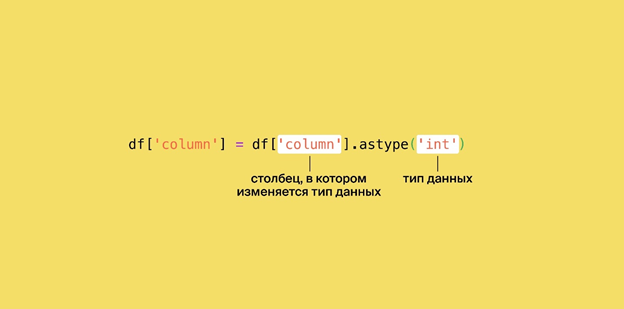



## Задача   
1. Переведите значения столбца **'id'** (таблицы **ids**) из строк в числа методом **to_numeric()**.



In [30]:
transactions['id'] = pd.to_numeric(transactions['id']) 

ValueError: Unable to parse string "Null" at position 48

2. Попробуйте ещё раз перевести значения столбца **'id'** из строк в числа методом **to_numeric()**, но уже со значением **'coerce'** параметра **errors**. Это заменит вызывающий ошибку Null на NaN.
Полученную таблицу выведите на экран методом **tail()**: так как ошибка возникает на последней строке, 5 значений с конца будет достаточно.

In [31]:
transactions['id'] = pd.to_numeric(transactions['id'], errors='coerce') 
transactions.tail(5)

,id,category,amount
44,6.007483e+11,A,8958.23
45,6.007483e+11,C,12771.10
46,6.007483e+11,E,9630.56
47,6.007483e+11,Null,NaN
48,NaN,A,14327.22


3. Вызовите метод **info()** после преобразований ещё раз. Проверьте, повлияла ли работа **pd.to_numeric(transactions['id'], errors='coerce')** на тип значений в столбце **id**.

In [32]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        48 non-null     float64
 1   category  49 non-null     object 
 2   amount    45 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


4. Методом **to_numeric()** превратите значения столбца **amount** в числа, заменив некорректные значения на NaN. Проверьте результаты преобразований методом **info()**.

In [33]:
transactions['amount'] = pd.to_numeric(transactions['amount'], errors='coerce') 

5. Посчитайте общую стоимость проданных товаров — сумму значений столбца **amount** в датафрейме **transactions**. Результат выведите на экран.

In [34]:
transactions['amount'].sum()

596107.1

6.
Рассчитайте сумму продаж для каждой категории. Для этого сгруппируйте датафрейм **transactions** по столбцу **category** и примените метод **sum()** к столбцу **amount**. Выведите результат на экран.

In [35]:
transactions.groupby('category')['amount'].sum()

category
A       133988.50
B       168617.89
C       173332.50
D        62630.82
E        57537.39
Null         0.00
Name: amount, dtype: float64

7. Вернитесь к таблице с трафиком  (датасет data). При попытке сгруппировать датафрейм 'data' по источнику трафика и посчитать сумму визитов, вместо ожидаемого результата получили странное склеивание идентификаторов подкатегорий. Но теперь  вы сможете найти сумму визитов.

Переведите значения столбца **visits** датафрейма data в числовой тип методом **to_numeric()**.

In [36]:
data['visits'] = pd.to_numeric(data['visits']) 

ValueError: Unable to parse string ""2369468"" at position 964

8. Узнайте, что не так со строкой 964. Вызовите знакомый из вводного курса метод **loc**.
Он позволяет обращаться к датафрейму по значению индекса, в нашем случае как раз по номеру строки.


In [37]:
data.loc[964]

subcategory_id        total
source               direct
visits            "2369468"
Name: 964, dtype: object

9. Вычислите, сколько всего строк в датафрейме и выведите на экран в формате:

Количество строк: 

Затем выведите на экран строки, которые имеют значение **'total'** в столбце **'subcategory_id'**. Изучите полученные результаты: сколько строк портят весь датасет?

In [38]:
print(f'Количество строк: {data.shape[0]}')

Количество строк: 1930


In [39]:
data[data['subcategory_id'] == 'total']

,subcategory_id,source,visits
964,total,direct,"""2369468"""
1929,total,organic,"""5687882"""


10. Оставьте в датафрейме только строки, удовлетворяющие условию **data['subcategory_id'] != 'total'**. Проверьте результат: выведите на экран датафрейм с условием **data['subcategory_id'] == 'total'**.

In [40]:
data = data[ data['subcategory_id'] != 'total' ]
data[data['subcategory_id'] == 'total']

,subcategory_id,source,visits


11. Измените тип данных в столбце **['visits']** на **integer**. Проверьте полученный результат, вызвав метод **info()**.

In [41]:
data['visits'] = data['visits'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 0 to 1928
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subcategory_id  1928 non-null   object
 1   source          1928 non-null   object
 2   visits          1928 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 52.7+ KB


12. Сгруппируйте данные по источникам и вычислите количество визитов для каждого источника. Выведите результат на экран.

In [42]:

data.groupby('source')['visits'].sum()

source
direct     2368980
organic    5687407
Name: visits, dtype: int32

# Метод merge()

Вы получили первые выводы: на органический трафик приходится в два раза больше визитов пользователей. Однако исследование на этом не закончено — нужно изучить трафик для каждой категории товаров.

Данные хранят в Excel-таблице из нескольких листов. Как смотреть на категории, подкатегории и трафик в одном месте? Идея — склеить таблицы!

Объединим несколько таблиц в одну методом **merge()**.

Метод **merge()** применяют к таблице, к которой присоединяют другую. У метода следующие аргументы:

•	**right** — имя **DataFrame** или **Series**, присоединяемого к исходной таблице ("правая таблица")

•	**on** — название общего списка в двух соединяемых таблицах: по нему происходит слияние ("ключи")

•	**how** — тип объединения (outer, inner, left, right)
Объединим таблицы **data** и **subcategory_dict** со следующими условиями:

•	**data** — таблица, к которой будем присоединять другую таблицу

•	**subcategory_dict** — таблица, которую присоединяем к data

•	**'subcategory_id'** — общий столбец в двух таблицах, по нему будем объединять

•	**how='left'** — id таблицы **data** включены в итоговую таблицу **data_subcategory**


In [43]:
data_subcategory = data.merge(subcategory_dict, on='subcategory_id', how='left')
print(data_subcategory.head(10)) 


  subcategory_id  source  visits                subcategory_name category_id
0     cf2e61c7af  direct  501165              Мобильные телефоны  09f279a643
1     0cd903d1cc  direct  126342                        Ноутбуки  3509869a61
2     ef35bc88a7  direct   95626                      Телевизоры  09f279a643
3     6ff9f4014c  direct   75680                        Планшеты  3509869a61
4     72bc238e4d  direct   64435  Наушники и Bluetooth-гарнитуры  09f279a643
5     88c78ea685  direct   39638                            Шины  65922fa39c
6     179bfacf4a  direct   31007           Умные часы и браслеты  09f279a643
7     b0fb8f259a  direct   30324                        Мониторы  3509869a61
8     3c67eb2d90  direct   25878                   Наручные часы  6074ad29ac
9     24e6c815c6  direct   25276  Лекарственные препараты и БАДы  10a493e03b


## Задача:

1. Объедините таблицы **data_subcategory** и **category_dict**. Результат сохраните в переменной **data_final** и выведите на экран первые 10 строк новой таблицы.

In [44]:
data_final = data_subcategory.merge(category_dict, on='category_id', how='left')
print(data_final.head(10)) 

  subcategory_id  source  visits                subcategory_name category_id  \
0     cf2e61c7af  direct  501165              Мобильные телефоны  09f279a643   
1     0cd903d1cc  direct  126342                        Ноутбуки  3509869a61   
2     ef35bc88a7  direct   95626                      Телевизоры  09f279a643   
3     6ff9f4014c  direct   75680                        Планшеты  3509869a61   
4     72bc238e4d  direct   64435  Наушники и Bluetooth-гарнитуры  09f279a643   
5     88c78ea685  direct   39638                            Шины  65922fa39c   
6     179bfacf4a  direct   31007           Умные часы и браслеты  09f279a643   
7     b0fb8f259a  direct   30324                        Мониторы  3509869a61   
8     3c67eb2d90  direct   25878                   Наручные часы  6074ad29ac   
9     24e6c815c6  direct   25276  Лекарственные препараты и БАДы  10a493e03b   

                category_name  
0                 Электроника  
1        Компьютерная техника  
2                 Элект

# Сводные таблицы

Сводная таблица — ваш помощник для обобщения данных и их наглядного представления.
Перед вами таблица со статистикой продаж товаров в интернет-магазине. Известны название товара, дата продажи, количество, цена и стоимость доставки.
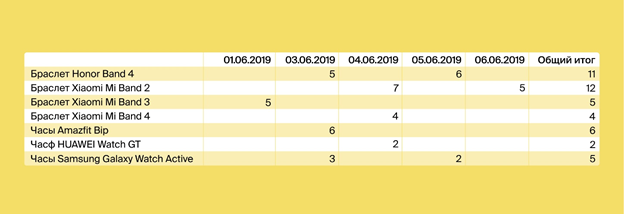

По сводным таблицам можно точно сказать, сколько товара было продано в определённый день. Умение строить сводные таблицы позволяет быстро анализировать данные и сразу подготовить отчёты.

Например, по данной сводной таблице можно легко ответить  на вопрос: «Сколько товара продал интернет-магазин 4 июня 2019 года?». 

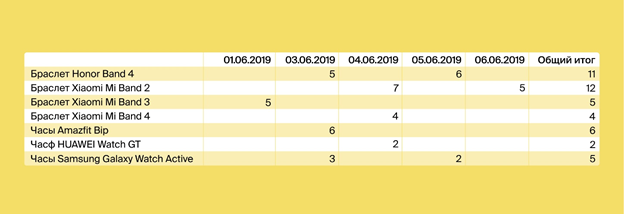

В Pandas для подготовки сводных таблиц вызывают метод **pivot_table()**.

Аргументы метода:

•	**index** — столбец или столбцы, по которым группируют данные (название товара)

•	**columns** — столбец, по значениям которого происходит группировка (даты)

•	**values** — значения, по которым мы хотим увидеть сводную таблицу (количество проданного товара)

•	**aggfunc** — функция, применяемая к значениям (сумма товаров)

Построим сводную таблицу для задачи по SEO-оптимизации.
Сделаем по таблице **data_final** из предыдущего задания сводную таблицу методом **pivot_table()**:

**data_pivot = data_final.pivot_table(index=['category_name', 'subcategory_name'], columns='source',
                                    values='visits', aggfunc='sum')**


In [45]:
#Скопируйте сюда код
data_pivot = data_final.pivot_table(index=['category_name', 'subcategory_name'], columns='source',
                                    values='visits', aggfunc='sum')
data_pivot


source                                   direct  organic
category_name subcategory_name                          
Авто          Автоакустика                 5915    15433
              Автомагнитолы                7783    18690
              Автомобильные инверторы       145      150
              Автомобильные компрессоры     407      790
              Автомобильные телевизоры      975     2246
...                                         ...      ...
Электроника   Чехлы                        4582    11758
              Чехлы-аккумуляторы            219      331
              Штативы и моноподы           1152     2540
              Экшн-камеры                  4757    12376
              Электронные книги            4515    11364

[934 rows x 2 columns]

Теперь вы видите название категории и её подкатегории со значениями объёма трафика по каждой.

Как видно, основная категория включает в себя подкатегорию и это представлено в структуре датафрейма: категория отображена иерархически главной над подкатегорией. Такие датафреймы содержат в себе мультииндекс. Часто при работе с такими датафреймами мультииндекс убирают, чтобы категория была отображена на каждой строчке датафрейма:

**data_pivot_with_reset_index = data_pivot.reset_index()
print(data_pivot_with_reset_index.head(10)) **



In [46]:
data_pivot_with_reset_index = data_pivot.reset_index()
print(data_pivot_with_reset_index.head(10))

source category_name            subcategory_name  direct  organic
0               Авто                Автоакустика    5915    15433
1               Авто               Автомагнитолы    7783    18690
2               Авто     Автомобильные инверторы     145      150
3               Авто   Автомобильные компрессоры     407      790
4               Авто    Автомобильные телевизоры     975     2246
5               Авто  Автомобильные холодильники     204      285
6               Авто            Автосигнализации     494     1026
7               Авто      Аккумуляторные батареи    1175     2657
8               Авто                   Антифризы     736     1568
9               Авто         Багажники, рейлинги     342      664


В таблице выше суммы визитов **visits** по каждому из источников **source (direct и organic)** представлены в отдельных столбцах. Такой вид таблицы называется «широкий». Он удобен, когда нужно сравнить значения столбцов. Хорошо заметно, например, что в подкатегории «Автомобильные инверторы» количество визитов из источников **direct** и **organic** практически одинаково, а в подкатегории «Автомагнитолы» из источника **organic** пришло почти в два раза больше посетителей, чем из **direct**.

Для группировки данных также подходит изученная вами ранее комбинация методов **groupby()** и **agg()** , но с ними таблица будет выглядеть иначе.

Метод **groupby()** принимает один аргумент — столбец (или список столбцов), по которым группируют данные. В метод **agg()** передают словарь. Его ключ — это названия столбцов, а значение — функции, которые будут к этим столбцам применены (например, **sum или count**). Такие функции называются агрегирующие.
Решим ту же задачу по SEO-оптимизации методами **groupby() и agg()**:


**data_grouped = data_final.groupby(['category_name','subcategory_name','source']).agg({'visits':'sum'})**

**print(data_grouped.head(10))**


In [47]:
data_grouped = data_final.groupby(['category_name','subcategory_name','source']).agg({'visits':'sum'})

print(data_grouped.head(10))

                                                 visits
category_name subcategory_name          source         
Авто          Автоакустика              direct     5915
                                        organic   15433
              Автомагнитолы             direct     7783
                                        organic   18690
              Автомобильные инверторы   direct      145
                                        organic     150
              Автомобильные компрессоры direct      407
                                        organic     790
              Автомобильные телевизоры  direct      975
                                        organic    2246


Сгруппировав данные методами **groupby()** и **agg()** вместо **pivot_table()**, мы получили точно такие же данные, но в несколько другом виде. Он называется «длинный». Методы **groupby()** и **agg()** удобны, когда нужно применить функцию к столбцу со сгруппированными визитами **visits** или создать новый столбец на его основе:

**data_grouped['daily_visits'] = data_grouped['visits'] / 30
print(data_grouped.head(10))** 


In [48]:
data_grouped['daily_visits'] = data_grouped['visits'] / 30
print(data_grouped.head(10))

                                                 visits  daily_visits
category_name subcategory_name          source                       
Авто          Автоакустика              direct     5915    197.166667
                                        organic   15433    514.433333
              Автомагнитолы             direct     7783    259.433333
                                        organic   18690    623.000000
              Автомобильные инверторы   direct      145      4.833333
                                        organic     150      5.000000
              Автомобильные компрессоры direct      407     13.566667
                                        organic     790     26.333333
              Автомобильные телевизоры  direct      975     32.500000
                                        organic    2246     74.866667


## Задачи:

1. Самостоятельно создайте сводную таблицу для набора **data_final**. Результат сохраните в переменной **data_pivot** и выведите первых 10 значений на экран.

2. Создайте в таблице **data_pivot** новый столбец **'ratio'** и сохраните в нём значение отношения органического трафика **'organic'** к прямому **'direct'**. Выведите первые 10 строк таблицы на экран.

3. Отсортируйте таблицу по столбцу **'ratio'** в порядке убывания. Выведите первые 10 строк. Отсортированную таблицу сохранять не нужно.

4. Отсортируйте таблицу по столбцу **'ratio'** в порядке убывания и выведите последние 10 записей, где прямой трафик больше 1000. Выражение напишите в скобках функции **print()**, чтобы результат напечатался на экран.



In [49]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subcategory_id    1928 non-null   object
 1   source            1928 non-null   object
 2   visits            1928 non-null   int32 
 3   subcategory_name  1928 non-null   object
 4   category_id       1928 non-null   object
 5   category_name     1928 non-null   object
dtypes: int32(1), object(5)
memory usage: 83.0+ KB


In [50]:
data_pivot = data_final.pivot_table(index=['category_name', 'subcategory_name'], columns='source', values='visits', aggfunc='sum')
data_pivot.head(10)

source                                    direct  organic
category_name subcategory_name                           
Авто          Автоакустика                  5915    15433
              Автомагнитолы                 7783    18690
              Автомобильные инверторы        145      150
              Автомобильные компрессоры      407      790
              Автомобильные телевизоры       975     2246
              Автомобильные холодильники     204      285
              Автосигнализации               494     1026
              Аккумуляторные батареи        1175     2657
              Антифризы                      736     1568
              Багажники, рейлинги            342      664

In [51]:
data_pivot['ratio'] = data_pivot['organic'] / data_pivot['direct']
data_pivot.head(10)

source                                    direct  organic     ratio
category_name subcategory_name                                     
Авто          Автоакустика                  5915    15433  2.609129
              Автомагнитолы                 7783    18690  2.401388
              Автомобильные инверторы        145      150  1.034483
              Автомобильные компрессоры      407      790  1.941032
              Автомобильные телевизоры       975     2246  2.303590
              Автомобильные холодильники     204      285  1.397059
              Автосигнализации               494     1026  2.076923
              Аккумуляторные батареи        1175     2657  2.261277
              Антифризы                      736     1568  2.130435
              Багажники, рейлинги            342      664  1.941520

In [52]:
data_pivot['ratio'].sort_values(ascending = False).head(10)

category_name           subcategory_name                  
Авто                    Шины                                  3.881604
Бытовая техника         Стиральные машины                     2.926487
Спорт и отдых           Велосипеды                            2.878818
Детские товары          Коляски                               2.876542
Строительство и ремонт  Сварочные аппараты                    2.805668
Товары для дома         Компьютерные кресла                   2.803963
Компьютерная техника    Клавиатуры                            2.798361
Электроника             Универсальные внешние аккумуляторы    2.784738
                        TV-тюнеры                             2.777211
Бытовая техника         Холодильники                          2.771750
Name: ratio, dtype: float64

In [53]:
data_pivot[ data_pivot['direct'] > 1000 ]['ratio'].sort_values(ascending = False).head(10)

category_name           subcategory_name                  
Авто                    Шины                                  3.881604
Бытовая техника         Стиральные машины                     2.926487
Спорт и отдых           Велосипеды                            2.878818
Детские товары          Коляски                               2.876542
Строительство и ремонт  Сварочные аппараты                    2.805668
Товары для дома         Компьютерные кресла                   2.803963
Компьютерная техника    Клавиатуры                            2.798361
Электроника             Универсальные внешние аккумуляторы    2.784738
                        TV-тюнеры                             2.777211
Бытовая техника         Холодильники                          2.771750
Name: ratio, dtype: float64